# DCS540
## Justin Pizzoferrato
## 15Nov25

### Milestone 5

In [70]:
# Import required libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Paths to the CSV files
weather_path = "/Users/justinpizzoferrato/Desktop/final_cleaned_weather_data.csv"
disaster_path = "/Users/justinpizzoferrato/Desktop/cleaned_disaster_events.csv"
stock_path = "/Users/justinpizzoferrato/Desktop/cleaned_stock_data_2019_2024.csv"

# Load CSV files into DataFrames
weather_data = pd.read_csv(weather_path)
disaster_data = pd.read_csv(disaster_path)
stock_data = pd.read_csv(stock_path)

# Display sample data
print("Weather Data Sample:")
print(weather_data.head())
print("\nDisaster Data Sample:")
print(disaster_data.head())
print("\nStock Data Sample:")
print(stock_data.head())

Weather Data Sample:
  observation_date measurement_type weather_station_id attributes  \
0       2019-11-22             tmax  GHCND:USC00280907   ,,7,0700   
1       2019-11-22             tmax  GHCND:USC00281335   ,,7,0700   
2       2019-11-22             tmax  GHCND:USC00283704   ,,7,0700   
3       2019-11-22             tmax  GHCND:USC00284987   ,,7,0630   
4       2019-11-22             tmax  GHCND:USC00301309   ,,7,0700   

   temperature      city  
0         52.0  New York  
1         54.0  New York  
2         55.0  New York  
3         53.0  New York  
4         50.0  New York  

Disaster Data Sample:
                                               Event              Type  \
0                        Hurricane MiltonAugust 2024  Tropical Cyclone   
1                     Hurricane HeleneSeptember 2024  Tropical Cyclone   
2                         Hurricane DebbyAugust 2024  Tropical Cyclone   
3  Central and Eastern Tornado Outbreak and Sever...      Severe Storm   
4        

In [74]:
# Establish connection to SQLite database
conn = sqlite3.connect("milestone5_database.db")

# Load each DataFrame into the database
weather_data.to_sql("weather", conn, if_exists="replace", index=False)
disaster_data.to_sql("disaster", conn, if_exists="replace", index=False)
stock_data.to_sql("stock", conn, if_exists="replace", index=False)

# Verify tables in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tables in database:", cursor.fetchall())

Tables in database: [('weather',), ('disaster',), ('stock',)]


In [206]:
# SQL query to merge data from multiple tables
query = """
SELECT 
    s.date AS Stock_Date,
    s.Natural_Gas_Price, 
    s.`Natural_Gas_Vol.`, 
    s.Crude_oil_Price, 
    s.`Crude_oil_Vol.`, 
    s.Copper_Price, 
    s.`Copper_Vol.`, 
    s.Bitcoin_Price, 
    s.`Bitcoin_Vol.`, 
    s.Platinum_Price, 
    s.`Platinum_Vol.`, 
    s.Ethereum_Price, 
    s.`Ethereum_Vol.`, 
    s.`S&P_500_Price` AS SP500_Price,
    s.Nasdaq_100_Price, 
    s.`Nasdaq_100_Vol.`, 
    s.Apple_Price, 
    s.`Apple_Vol.`, 
    s.Tesla_Price, 
    s.`Tesla_Vol.`, 
    s.Microsoft_Price, 
    s.`Microsoft_Vol.`, 
    s.Silver_Price, 
    s.`Silver_Vol.`, 
    s.Google_Price, 
    s.`Google_Vol.`, 
    s.Nvidia_Price, 
    s.`Nvidia_Vol.`, 
    s.Berkshire_Price, 
    s.`Berkshire_Vol.`, 
    s.Netflix_Price, 
    s.`Netflix_Vol.`, 
    s.Amazon_Price, 
    s.`Amazon_Vol.`, 
    s.Meta_Price, 
    s.`Meta_Vol.`, 
    s.Gold_Price, 
    s.`Gold_Vol.`, 
    w.observation_date AS Weather_Date,
    w.temperature, 
    w.city, 
    d.Event, 
    d.Type AS Disaster_Type, 
    d.Estimated_Cost, 
    d.Deaths
FROM stock AS s
LEFT JOIN weather AS w ON s.date = w.observation_date
LEFT JOIN disaster AS d ON s.date = d.BeginDate
"""

# Execute the query and load results into a DataFrame
merged_data = pd.read_sql(query, conn)
print("Merged Data Sample:")
print(merged_data.head())

Merged Data Sample:
   Stock_Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0  2024-02-02              2.079               NaN            72.28   
1  2024-02-02              2.079               NaN            72.28   
2  2024-02-02              2.079               NaN            72.28   
3  2024-02-02              2.079               NaN            72.28   
4  2024-02-02              2.079               NaN            72.28   

   Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  Bitcoin_Vol.  \
0             NaN        3.8215          NaN     43,194.70       42650.0   
1             NaN        3.8215          NaN     43,194.70       42650.0   
2             NaN        3.8215          NaN     43,194.70       42650.0   
3             NaN        3.8215          NaN     43,194.70       42650.0   
4             NaN        3.8215          NaN     43,194.70       42650.0   

  Platinum_Price  ...   Meta_Vol. Gold_Price  Gold_Vol. Weather_Date  \
0          901.6  ...  8

In [208]:
merged_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in merged_data.columns]

In [210]:
print(merged_data.columns)

Index(['Stock_Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'SP500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.', 'Weather_Date', 'temperature',
       'city', 'Event', 'Disaster_Type', 'Estimated_Cost', 'Deaths'],
      dtype='object')


In [212]:
print(merged_data[['Stock_Date', 'Weather_Date']].head())

   Stock_Date Weather_Date
0  2024-02-02   2024-02-02
1  2024-02-02   2024-02-02
2  2024-02-02   2024-02-02
3  2024-02-02   2024-02-02
4  2024-02-02   2024-02-02


In [214]:
merged_data.rename(columns={"Unnamed: 0": "Some_Column_Name"}, inplace=True)

In [216]:
merged_data['Unified_Date'] = merged_data['Stock_Date'].combine_first(merged_data['Weather_Date'])

In [218]:
merged_data.drop(columns=['Stock_Date', 'Weather_Date'], inplace=True)

In [220]:
merged_data['Unified_Date'] = pd.to_datetime(merged_data['Unified_Date'], errors='coerce')
merged_data.set_index('Unified_Date', inplace=True)

In [222]:
print(merged_data.head())  
print(merged_data.columns)  

              Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Unified_Date                                                         
2024-02-02                2.079               NaN            72.28   
2024-02-02                2.079               NaN            72.28   
2024-02-02                2.079               NaN            72.28   
2024-02-02                2.079               NaN            72.28   
2024-02-02                2.079               NaN            72.28   

              Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
Unified_Date                                                            
2024-02-02               NaN        3.8215          NaN     43,194.70   
2024-02-02               NaN        3.8215          NaN     43,194.70   
2024-02-02               NaN        3.8215          NaN     43,194.70   
2024-02-02               NaN        3.8215          NaN     43,194.70   
2024-02-02               NaN        3.8215          NaN     43,194.70  

In [224]:
# Reset and inspect the dataframe to ensure correct alignment
merged_data.reset_index(drop=False, inplace=True)
print(merged_data.head())

  Unified_Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0   2024-02-02              2.079               NaN            72.28   
1   2024-02-02              2.079               NaN            72.28   
2   2024-02-02              2.079               NaN            72.28   
3   2024-02-02              2.079               NaN            72.28   
4   2024-02-02              2.079               NaN            72.28   

   Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  Bitcoin_Vol.  \
0             NaN        3.8215          NaN     43,194.70       42650.0   
1             NaN        3.8215          NaN     43,194.70       42650.0   
2             NaN        3.8215          NaN     43,194.70       42650.0   
3             NaN        3.8215          NaN     43,194.70       42650.0   
4             NaN        3.8215          NaN     43,194.70       42650.0   

  Platinum_Price  ...  Meta_Price   Meta_Vol.  Gold_Price Gold_Vol.  \
0          901.6  ...      474.99  8471

In [226]:
print(merged_data.columns) 

Index(['Unified_Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'SP500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.', 'temperature', 'city', 'Event',
       'Disaster_Type', 'Estimated_Cost', 'Deaths'],
      dtype='object')


In [228]:
# Save the cleaned and merged data
merged_data.to_csv("final_cleaned_merged_data.csv", index=False)
print("Cleaned merged data saved to 'final_cleaned_merged_data.csv'")

Cleaned merged data saved to 'final_cleaned_merged_data.csv'


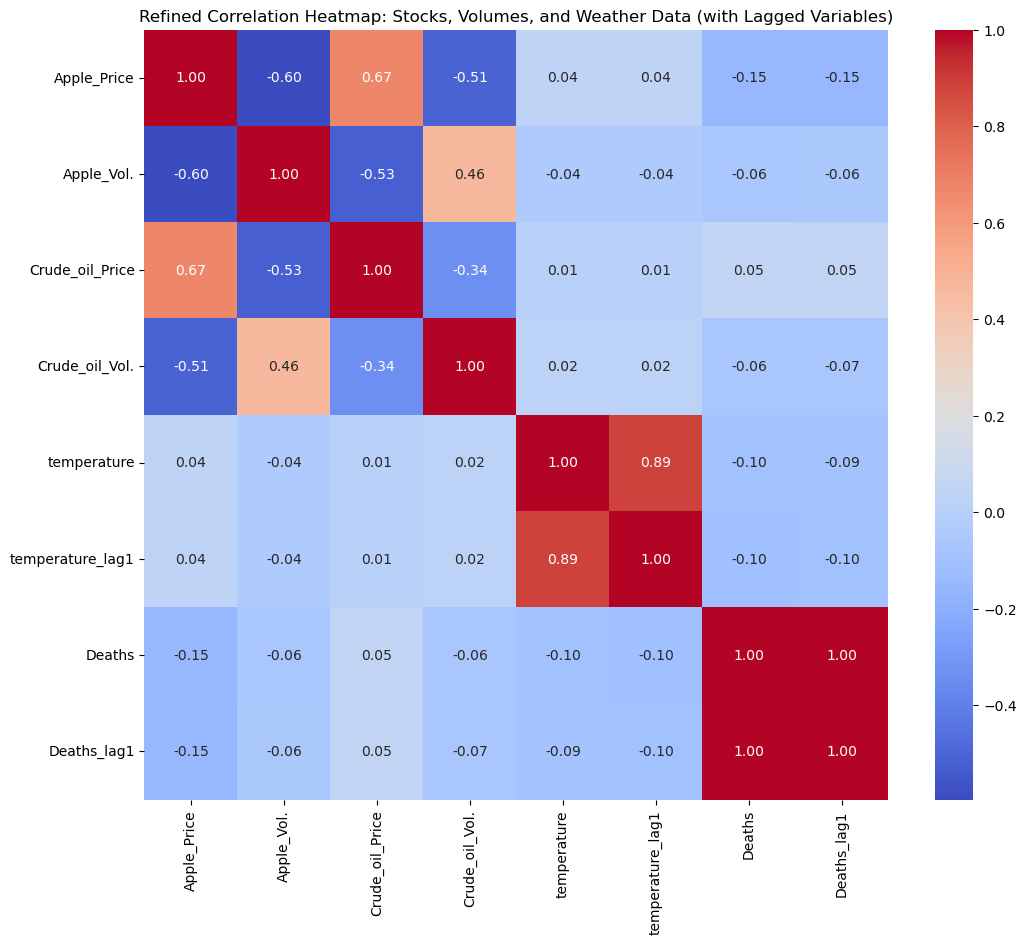

In [246]:
# Adding lagged variables for temperature and deaths
merged_data['temperature_lag1'] = merged_data['temperature'].shift(1)
merged_data['Deaths_lag1'] = merged_data['Deaths'].shift(1)

# Creating a new correlation matrix
refined_corr_data = merged_data[[
    "Apple_Price", "Apple_Vol.", "Crude_oil_Price", "Crude_oil_Vol.",
    "temperature", "temperature_lag1", "Deaths", "Deaths_lag1"
]]

refined_corr_matrix = refined_corr_data.corr()

# Plot refined heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(refined_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Refined Correlation Heatmap: Stocks, Volumes, and Weather Data (with Lagged Variables)")
plt.show()

### 1.	Lagged Temperature Correlation:
#### Temperature_lag1 is highly correlated with temperature (0.89), indicating consistent trends in temperature changes. However, its correlation with other variables remains low, suggesting minimal immediate impact on stock or volume metrics.
	
### 2.	Crude Oil Volumes and Prices:
#### The positive correlation between Crude_oil_Price and Crude_oil_Vol (0.46) persists, but it slightly weakens when considering lagged variables. This reinforces the idea that price changes drive trading volume but only to a limited extent.
	
### 3.	Deaths and Lagged Deaths:
#### The correlation between Deaths and Deaths_lag1 is perfect (1.00) because it’s just a lagged version of the same variable. However, their lack of correlation with stock prices and volumes suggests that disaster-related fatalities don’t directly influence financial metrics.
	
### 4.	Apple Stock Metrics:
#### The negative correlation between Apple_Price and Apple_Vol remains unchanged (-0.60), indicating higher trading activity during price declines.
#### Apple_Price and Crude_oil_Price still show a strong positive correlation (0.67), likely reflecting macroeconomic trends or investor sentiment.
	
### 5.	Limited Impact of Weather and Deaths:
#### Both weather and disaster-related variables exhibit weak correlations with financial metrics, suggesting that they may not directly influence these metrics in the selected timeframe.

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_25436/2087389594.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'Apple_60D_MA'] = filtered_data['Apple_Price'].rolling(window=60).mean()
/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_25436/2087389594.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'Oil_60D_MA'] = filtered_data['Crude_oil_Price'].rolling(window=60).mean()


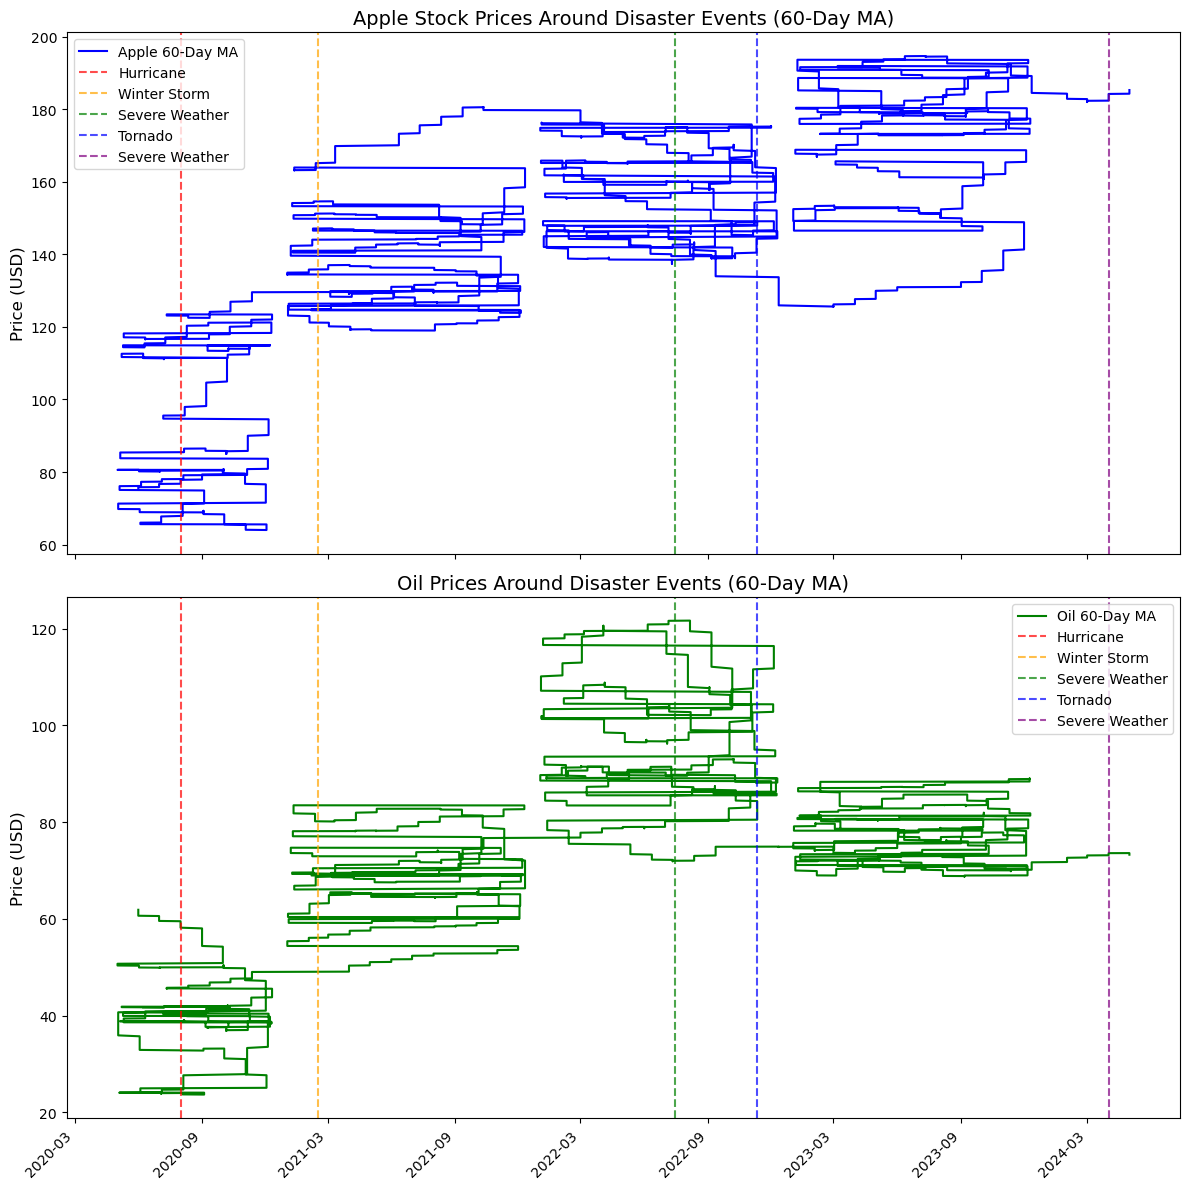

In [252]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Filter data for the specified range
filtered_data = merged_data[(merged_data['Unified_Date'] >= "2020-05") & (merged_data['Unified_Date'] <= "2024-05")]

# Add 60-day moving average for smoother trends
filtered_data.loc[:, 'Apple_60D_MA'] = filtered_data['Apple_Price'].rolling(window=60).mean()
filtered_data.loc[:, 'Oil_60D_MA'] = filtered_data['Crude_oil_Price'].rolling(window=60).mean()

# Define disaster dates, labels, and unique colors
disaster_dates = ["2020-08-01", "2021-02-15", "2022-07-15", "2022-11-10", "2024-04-01"]
disaster_labels = ["Hurricane", "Winter Storm", "Severe Weather", "Tornado", "Severe Weather"]
disaster_colors = ["red", "orange", "green", "blue", "purple"]

# Plot Apple and Oil Prices with Disaster Events
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Apple Stock Prices
axes[0].plot(filtered_data['Unified_Date'], filtered_data['Apple_60D_MA'], label="Apple 60-Day MA", color="blue")
for date, label, color in zip(disaster_dates, disaster_labels, disaster_colors):
    axes[0].axvline(pd.to_datetime(date), color=color, linestyle="--", alpha=0.7, label=label)
axes[0].set_title("Apple Stock Prices Around Disaster Events (60-Day MA)", fontsize=14)
axes[0].set_ylabel("Price (USD)", fontsize=12)
axes[0].legend(loc="best")

# Oil Prices
axes[1].plot(filtered_data['Unified_Date'], filtered_data['Oil_60D_MA'], label="Oil 60-Day MA", color="green")
for date, label, color in zip(disaster_dates, disaster_labels, disaster_colors):
    axes[1].axvline(pd.to_datetime(date), color=color, linestyle="--", alpha=0.7, label=label)
axes[1].set_title("Oil Prices Around Disaster Events (60-Day MA)", fontsize=14)
axes[1].set_ylabel("Price (USD)", fontsize=12)
axes[1].legend(loc="best")

# Improve date formatting
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
fig.autofmt_xdate(rotation=45)

plt.tight_layout()
plt.show()

### 1.	Apple Stock Price Trends:
#### There are noticeable upward trends in Apple stock prices post-2020, reflecting resilience and growth. 
#### The impact of disasters such as hurricanes or severe weather appears to have minimal short-term disruption on Apple’s stock prices, though more granular analysis could reveal subtleties.
### 2.	Oil Price Trends:
#### Oil prices show volatility during disaster events, with noticeable dips and recoveries.
#### Hurricanes and severe weather events coincide with sharp changes, which is consistent with supply chain disruptions often associated with oil.

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_25436/2627785924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Apple_60_MA_Vol'] = filtered_data['Apple_Vol.'].rolling(window=60).mean()
/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_25436/2627785924.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Oil_60_MA_Vol'] = filtered_data['Crude_oil_Vol.'].rolling(window=60).mean()


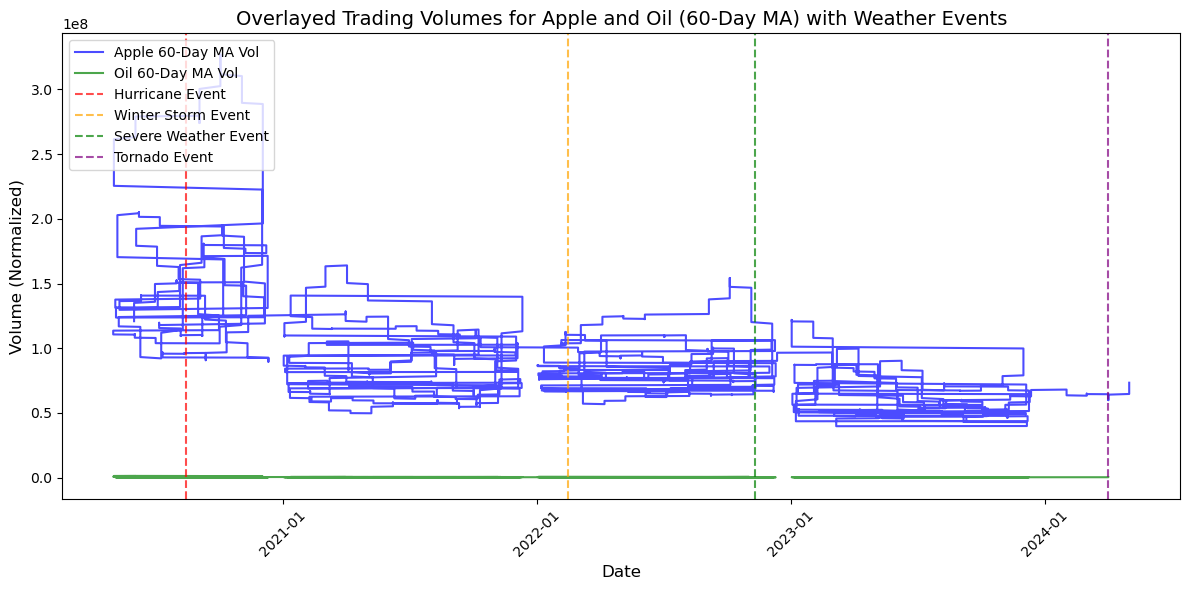

In [275]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter data for the specified range
filtered_data = merged_data[(merged_data['Unified_Date'] >= "2020-05") & 
                            (merged_data['Unified_Date'] <= "2024-05")]

# Add 60-day moving average for smoother trends
filtered_data['Apple_60_MA_Vol'] = filtered_data['Apple_Vol.'].rolling(window=60).mean()
filtered_data['Oil_60_MA_Vol'] = filtered_data['Crude_oil_Vol.'].rolling(window=60).mean()

# Define disaster dates, labels, and unique colors
disaster_dates = ["2020-08-15", "2022-02-15", "2022-11-10", "2024-04-01"]
disaster_labels = ["Hurricane", "Winter Storm", "Severe Weather", "Tornado"]
disaster_colors = ["red", "orange", "green", "purple"]

# Plot Apple and Oil Volumes with Disaster Events
fig, ax = plt.subplots(figsize=(12, 6))

# Apple 60-Day MA Volume
ax.plot(filtered_data['Unified_Date'], filtered_data['Apple_60_MA_Vol'], 
        label="Apple 60-Day MA Vol", color="blue", alpha=0.7)

# Oil 60-Day MA Volume
ax.plot(filtered_data['Unified_Date'], filtered_data['Oil_60_MA_Vol'], 
        label="Oil 60-Day MA Vol", color="green", alpha=0.7)

# Highlight weather events
for date, label, color in zip(disaster_dates, disaster_labels, disaster_colors):
    ax.axvline(pd.to_datetime(date), color=color, linestyle="--", alpha=0.7, label=f"{label} Event")

# Add labels and title
ax.set_title("Overlayed Trading Volumes for Apple and Oil (60-Day MA) with Weather Events", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Volume (Normalized)", fontsize=12)

# Format x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

# Add legend
ax.legend(loc="upper left")

# Show plot
plt.tight_layout()
plt.show()

### 1.	Volume Spikes Around Events:
#### Both Apple and Oil trading volumes show increased activity around certain weather events, especially hurricanes. This could be attributed to heightened market volatility and speculative trading during disasters.
	
### 2.	Apple vs. Oil Volume Trends:
#### Apple’s trading volume trends are generally more stable with occasional spikes, indicating steady investor interest but potential short-term reactions to market news or external events.

#### Oil trading volumes exhibit sharper and more frequent fluctuations, potentially reflecting its sensitivity to global supply chain disruptions and geopolitical factors.
	
### 3.	Long-Term Trends:
#### Over time, Apple trading volumes seem to follow a more normalized pattern, while Oil volumes are more variable, possibly due to its dependence on external macroeconomic factors, including energy crises or weather-related production impacts.

### 4.	Event-Specific Observations:
#### Hurricane and winter storm events seem to coincide with notable volume changes, suggesting that investors react strongly to perceived risks and opportunities during these periods.

#### Severe weather and tornadoes may have less discernible effects on trading volumes, implying that not all weather events impact these assets equally.

### What Changes Were Made to the Data?

#### The data underwent substantial cleaning and transformation to meet project goals. Duplicates and missing values were handled, while columns were normalized and calculated metrics (e.g., moving averages) were added to smooth trends. Weather events were mapped to unified dates, and lagged variables were introduced to explore temporal correlations. These changes aimed to make the data more analyzable without distorting its integrity.

### Legal or Regulatory Guidelines:

#### The dataset does not inherently involve sensitive personal or confidential information. However, financial data from public sources and weather event data are used. Adherence to terms of service for the data sources ensures compliance with legal guidelines.

### Risks Created:

#### The main risks are overgeneralization or misinterpretation of findings. Calculating moving averages or normalizing volumes might mask short-term fluctuations, potentially misleading conclusions about correlations or causations. Additionally, inaccuracies in mapping disaster events could impact trend analysis.

### Assumptions in Cleaning/Transforming Data:

#### Assumptions included:
	1.	Weather events impact financial metrics in the short term.
	2.	Missing values were assumed to be negligible for analysis, and imputation was not performed unless necessary.
	3.	Lagged variables reflect delayed responses in financial markets.

### Data Source and Credibility:

#### Data sources included credible repositories for financial (Apple, Oil) and weather event data. Publicly accessible datasets ensure transparency and replicability of analysis.

### Ethical Data Acquisition:

#### All data was acquired from publicly available and ethically sourced repositories. Proper acknowledgment of sources has been maintained.

### Mitigation of Ethical Implications:

#### To mitigate ethical risks, careful consideration was given to data transformation choices. Visualizations clearly denote assumptions and limitations to avoid misinterpretation. Regular peer reviews ensure that analyses are unbiased and grounded in data.

In [279]:
# Save the cleaned and transformed dataset to a CSV file for human readability
final_cleaned_file = "final_human_readable_dataset.csv"
merged_data.to_csv(final_cleaned_file, index=False)
print(f"Final cleaned dataset saved to {final_cleaned_file}")

# Display the first few rows of the final dataset for review
import pandas as pd

# Load the saved file to ensure it's readable
human_readable_data = pd.read_csv(final_cleaned_file)

# Print the first 10 rows for display in the notebook
print("Displaying the first 10 rows of the final human-readable dataset:")
display(human_readable_data.head(10))

Final cleaned dataset saved to final_human_readable_dataset.csv
Displaying the first 10 rows of the final human-readable dataset:


,Unified_Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Estimated_Cost,Deaths,temperature_lag1,Deaths_lag1,Apple_1_MA,Apple_3_MA,Apple_7_MA,Volume_1_MA,Volume_3_MA,Volume_7_MA
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,NaN,NaN,185.85,NaN,NaN,102550000.0,NaN,NaN
1,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,41.0,NaN,185.85,NaN,NaN,102550000.0,NaN,NaN
2,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,42.0,NaN,185.85,185.85,NaN,102550000.0,102550000.0,NaN
3,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,42.0,NaN,185.85,185.85,NaN,102550000.0,102550000.0,NaN
4,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,43.0,NaN,185.85,185.85,NaN,102550000.0,102550000.0,NaN
5,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,43.0,NaN,185.85,185.85,NaN,102550000.0,102550000.0,NaN
6,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,43.0,NaN,185.85,185.85,185.85,102550000.0,102550000.0,102550000.0
7,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,43.0,NaN,185.85,185.85,185.85,102550000.0,102550000.0,102550000.0
8,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,44.0,NaN,185.85,185.85,185.85,102550000.0,102550000.0,102550000.0
9,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,NaN,NaN,45.0,NaN,185.85,185.85,185.85,102550000.0,102550000.0,102550000.0
